In [2]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
print("OpenCV Version : {} ".format(cv2.__version__))

OpenCV Version : 3.3.0 


# Problem 1 - Harris Corner Detection

(2, 2)
(3, 2)
(396, 2)
(397, 2)
(2, 3)
(3, 3)
(50, 3)
(51, 3)
(52, 3)
(99, 3)
(100, 3)
(101, 3)
(149, 3)
(150, 3)
(151, 3)
(198, 3)
(199, 3)
(200, 3)
(249, 3)
(250, 3)
(251, 3)
(298, 3)
(299, 3)
(300, 3)
(348, 3)
(349, 3)
(350, 3)
(396, 3)
(397, 3)
(49, 43)
(52, 43)
(99, 43)
(101, 43)
(102, 43)
(148, 43)
(151, 43)
(198, 43)
(201, 43)
(248, 43)
(251, 43)
(300, 43)
(347, 43)
(350, 43)
(3, 44)
(49, 44)
(50, 44)
(51, 44)
(99, 44)
(100, 44)
(101, 44)
(149, 44)
(150, 44)
(151, 44)
(198, 44)
(199, 44)
(200, 44)
(201, 44)
(248, 44)
(249, 44)
(250, 44)
(298, 44)
(299, 44)
(300, 44)
(348, 44)
(349, 44)
(350, 44)
(396, 44)
(3, 45)
(49, 45)
(50, 45)
(51, 45)
(99, 45)
(100, 45)
(101, 45)
(149, 45)
(150, 45)
(151, 45)
(199, 45)
(200, 45)
(248, 45)
(249, 45)
(250, 45)
(298, 45)
(299, 45)
(300, 45)
(348, 45)
(349, 45)
(350, 45)
(396, 45)
(3, 46)
(49, 46)
(51, 46)
(52, 46)
(99, 46)
(101, 46)
(148, 46)
(149, 46)
(150, 46)
(151, 46)
(198, 46)
(199, 46)
(200, 46)
(201, 46)
(248, 46)
(250, 46)
(251, 46)
(2

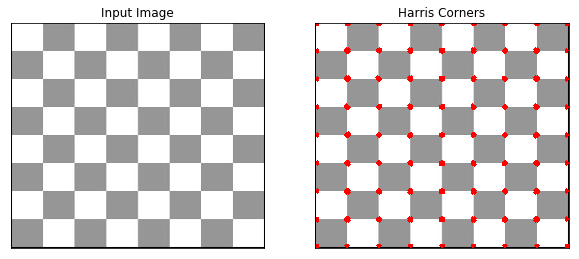

True

In [26]:
img1 = cv2.imread('chessboard.jpg')
# create copy
img_disp = img1.copy()

# Grayscale
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# Sobel x-axis kernel
SOBEL_X = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int32")

# Sobel y-axis kernel
SOBEL_Y = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int32")

# Gaussian kernel
GAUSS = np.array((
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]), dtype="float64")


def convolve(f, h):
    if h.shape[0] % 2 != 1 or h.shape[1] % 2 != 1:
        raise ValueError("Only odd dimensions on filter supported")

    img_height = f.shape[0]
    img_width = f.shape[1]
    pad_height = h.shape[0] // 2
    pad_width = h.shape[1] // 2
    # Allocate result image.
    pad = ((pad_height, pad_height), (pad_height, pad_width))
    g = np.empty(f.shape, dtype=np.float64)
    f = np.pad(f, pad, mode='constant', constant_values=0)
    # Do convolution
    for i in np.arange(pad_height, img_height+pad_height):
        for j in np.arange(pad_width, img_width+pad_width):
            roi = f[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1]
            g[i - pad_height, j - pad_width] = (roi*h).sum()
            
    if (g.dtype == np.float64):
        h = h / 255.0 
        h = (h*255).astype(np.uint8)
    else:
        g = g + abs(np.amin(g))
        g = g / np.amax(g)
        g = (g*255.0)

    return g


dx = convolve(img1_gray, SOBEL_X)

dy = convolve(img1_gray, SOBEL_Y)



dx2 = np.square(dx)
dy2 = np.square(dy)
dxdy = dx*dy

g_dx2 = convolve(dx2, GAUSS)
g_dy2 = convolve(dy2, GAUSS)
g_dxdy = convolve(dxdy, GAUSS)
                      
alpha = 0.12

harris = g_dx2*g_dy2 - np.square(g_dxdy) - alpha*np.square(g_dx2 + g_dy2)

cv2.normalize(harris, harris, 0, 1, cv2.NORM_MINMAX)


# set a threshold
thres = 0.6
# find all points above threshold
loc = np.where(harris >= thres)
# loop though the points
for pt in zip(*loc[::-1]):
    # draw filled circle on each point
    cv2.circle(img_disp, pt, 3, (255, 0, 0), -1)










# display images
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img1_gray, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_disp)
plt.title("Harris Corners"), plt.xticks([]), plt.yticks([])
plt.show()

cv2.imwrite("output/q1.png", cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB))



# Problem 2 - Panoramic Images

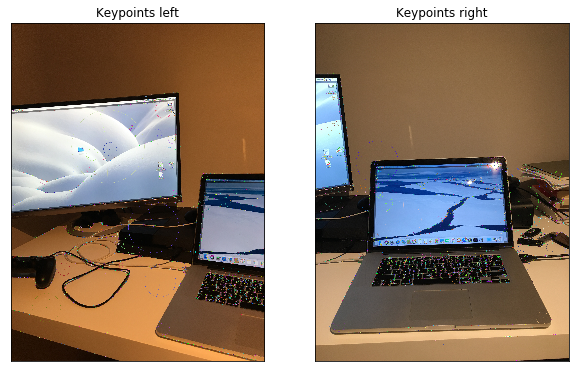

In [56]:
# load images
img1 = cv2.imread("left.jpg")
img2 = cv2.imread("right.jpg")

# convert to rgb
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)



# create copy
img1_kp = img1.copy()
img2_kp = img2.copy()


sift = cv2.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

cv2.drawKeypoints(img1, kp1, img1_kp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.drawKeypoints(img2, kp2, img2_kp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# display images
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img1_kp)
plt.title("Keypoints left"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img2_kp)
plt.title("Keypoints right"), plt.xticks([]), plt.yticks([])
plt.show()

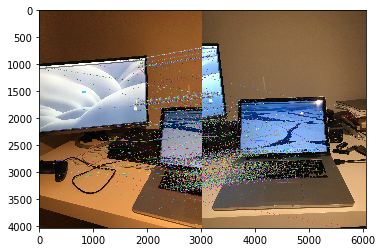

(<matplotlib.image.AxesImage at 0x1182817f0>, None)

In [57]:
bf = cv2.BFMatcher()
raw_matches = bf.knnMatch(des1, des2, 2)

# Lowe ratio test
ratio = 0.75
matches = [m for m, n in raw_matches if m.distance < n.distance * ratio]

img3 = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags= 2)
plt.imshow(img3), plt.show()

In [58]:
MIN_MATCH_COUNT = 10
threshold = 10.0

if len(matches) > MIN_MATCH_COUNT:
    pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
    pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)

    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, threshold)
    
else:
    print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))

188
376
751
1501
3001
6002


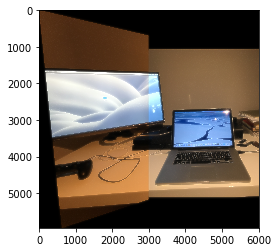

(<matplotlib.image.AxesImage at 0x10a090908>, None)

In [62]:
h1,w1 = img1.shape[:2]
h2,w2 = img2.shape[:2]

pts1 = np.float32([ [0, 0], [0, h1], [w1, h1], [w1, 0] ]).reshape(-1,1,2)
pts2 = np.float32([ [0, 0], [0, h2], [w2, h2], [w2, 0] ]).reshape(-1,1,2)

# perspective transform image 1
pts1_ = cv2.perspectiveTransform(pts1, H)

# connect the transformed image 1 points with original image 2 points
pts = np.concatenate((pts1_, pts2), axis=0)

# get min and max coordinates of connected image
[xmin, ymin] = np.int32(pts.min(axis=0).ravel() - 0.5)
[xmax, ymax] = np.int32(pts.max(axis=0).ravel() + 0.5)
t = [-xmin,-ymin]

# make translation matrix to fit image 1 to connected result
Ht = np.array([ [1, 0, t[0]], [0, 1, t[1]], [0, 0, 1] ])
Mt = np.float32( [[1, 0, t[0]], [0, 1, t[1]] ])

# warp perspective with original perspective matrix and translation matrix together
# set result size to calculated max size
result1 = cv2.warpPerspective(img1, Ht.dot(H), (xmax-xmin, ymax-ymin))

# warp affine with translation matrix on image 2
result2 = cv2.warpAffine(img2, Mt, (xmax-xmin, ymax-ymin))


def blend(A, B):
    # generate Gaussian pyramid for A
    G = A.copy()
    gpA = [G]
    for i in range(6):
        G = cv2.pyrDown(gpA[i])
        gpA.append(G)
    # generate Gaussian pyramid for B
    G = B.copy()
    gpB = [G]
    for i in range(6):
        G = cv2.pyrDown(gpB[i])
        gpB.append(G)
    # generate Laplacian Pyramid for A
    lpA = [gpA[5]]
    for i in range(5,0,-1):
        size = (gpA[i-1].shape[1], gpA[i-1].shape[0])
        GE = cv2.pyrUp(gpA[i], dstsize=size)
        L = cv2.subtract(gpA[i-1], GE)
        lpA.append(L)
    # generate Laplacian Pyramid for B
    lpB = [gpB[5]]
    for i in range(5,0,-1):
        size = (gpB[i-1].shape[1], gpB[i-1].shape[0])
        GE = cv2.pyrUp(gpB[i], dstsize=size)
        L = cv2.subtract(gpB[i-1], GE)
        lpB.append(L)
    # Now add left and right halves of images in each level
    LS = []
    for la, lb in zip(lpA, lpB):
        rows, cols, dpt = la.shape
        ls = np.hstack((la[:, 0:int(cols/2)], lb[:, int(cols/2):]))
        LS.append(ls)
    # now reconstruct
    ls_ = LS[0]
    for i in range(1,6):
        size = (LS[i].shape[1], LS[i].shape[0])
        ls_ = cv2.pyrUp(ls_, dstsize=size)
        ls_ = cv2.add(ls_, LS[i])
    
    
    return ls_

final = blend(result1, result2)
plt.imshow(final), plt.show()